In [1]:
import os, sys
import numpy as np
import pandas as pd
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.pyplot as plt


# Extract Run Results

In [2]:
def extract_event_file(exp: str, dataset: str) -> dict:
    """ Get event file for most recent run on specified experiment and dataset.

    Args:
        exp (str): 'heb' (baseline) or 'rob-heb'
        dataset (str): 'mnist', 'mnist-fashion', or 'cifar-10'

    Returns:
        dict: maps scalars to results across all epochs
    """
    base_tensorboard_dir = f'../output/tensorboard/runs/{dataset}/{exp}'
    
    files = os.listdir(base_tensorboard_dir)
    dirs = [name for name in files if os.path.isdir(os.path.join(base_tensorboard_dir, name)) and not name.startswith('.')]
    paths = [os.path.join(base_tensorboard_dir, basename) for basename in dirs]
    run_dir = max(paths, key=os.path.getctime)

    files = os.listdir(run_dir)
    files = [name for name in files if os.path.isfile(os.path.join(run_dir, name)) and not name.startswith('.')]
    paths = [os.path.join(run_dir, basename) for basename in files]

    # get event files
    event_file = max(paths, key=os.path.getctime)
    
    event_acc = EventAccumulator(event_file)
    event_acc.Reload()
    
    scalars = event_acc.Tags()['scalars']
    scalar_dict = {
        'step': [],
        'wall_time': []
    }

    for scalar in scalars:
        scalar_dict[scalar] = []

    # Iterate through events and extract scalar values
    for scalar in scalars:
        events = event_acc.Scalars(scalar)
        
        # Store values if events exist for this scalar
        if events:
            scalar_dict['step'] = [event.step for event in events]
            scalar_dict['wall_time'] = [event.wall_time for event in events]
            scalar_dict[scalar] = [event.value for event in events]
    
    return scalar_dict

In [3]:
heb_mnist_results = extract_event_file('heb', 'mnist')
rob_mnist_results = extract_event_file('rob-heb', 'mnist')

heb_fashion_results = extract_event_file('heb', 'mnist-fashion')
rob_fashion_results = extract_event_file('rob-heb', 'mnist-fashion')

# Visualizations

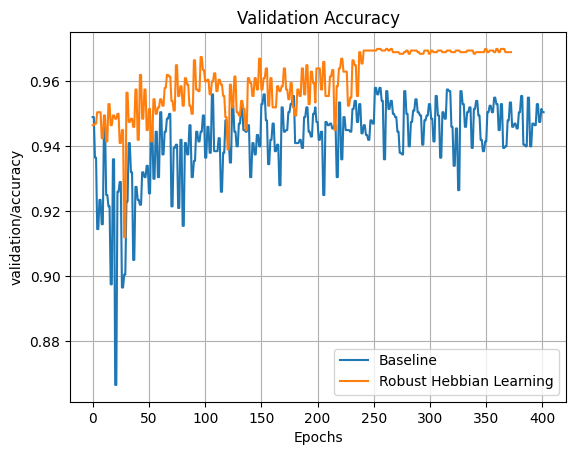

In [4]:
# plot validation accuracy for mnist
key = 'validation/accuracy'
dic1 = heb_mnist_results
dic2 = rob_mnist_results

plt.plot(range(len(dic1[key])), dic1[key], label=f'Baseline')
plt.plot(range(len(dic2[key])), dic2[key], label=f'Robust Hebbian Learning')

plt.title("Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel(f"{key}")
plt.legend()
plt.grid(True)
plt.show()


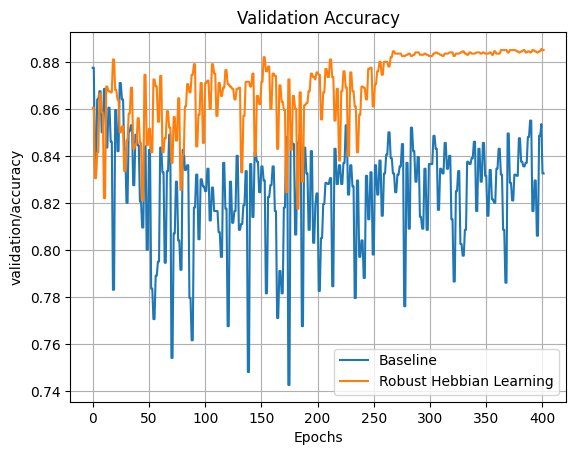

In [8]:
# plot validation accuracy for mnist
key = 'validation/accuracy'
dic1 = heb_fashion_results
dic2 = rob_fashion_results

# plt.figure(figsize=(10, 6))
plt.plot(range(len(dic1[key])), dic1[key], label=f'Baseline')
plt.plot(range(len(dic2[key])), dic2[key], label=f'Robust Hebbian Learning')

plt.title("Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel(f"{key}")
plt.legend()
plt.grid(True)
plt.show()
